In [69]:
import pandas as pd
import numpy as np
#Load common functions
# %run common.ipynb
import ipynb.fs.full.common as common

# #OJO!!!!!!! 
eL DATASET TIENE A CHECOSLOVAQUIA Y TAMBIEN REPUBLICA CHECA Y ESLOVAQUIA. VER CUANDO SE DIVIDEN Y PENSAR QUE HACER.
PARA DEVELOPED -> Esos paises estan pero con todos sus valores en null, lo que da mucha mas confianza sobre la calidad de los datos. Gracias ingenieros y cientificos que vinieron antes que yo :)
Evaluar tambien la posibilidad de tener una notebook propia de limpieza para cada set de datos que guarde en otro lado el dataset limpio y listo para ser consumido para su comparacion contra mml. Seria una notebook por dataset por region, sin mucho para automatizar o factorizar, ya que es un trabajo artesanal

In [70]:
MML_VARIABLE_ANALYZED = 'EXLIFE'
REGION = 'AFRICA' 

In [71]:
df = pd.read_excel(f"data/{REGION}/Life Expectancy.xlsx", sheet_name='countries_and_territories')
df[0:5]

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45


In [72]:
del df['indicator.name']
del df['geo']
del df['indicator']
df.columns = df.columns.astype(str)

In [73]:
def fix_countries_for_region(df, region=REGION):
    '''Matc h country column name in dataset with MML dict of country names for region.
    Unfortunately, it's a manual job. We know which names are missing according to MML, but we don't how the truth dataset named that country (if exists at all).
    
    '''
    if region == 'DEVELOPED':
        fix_countries_for_developed(df)
    if region == 'LAM':
        fix_countries_for_lam(df)
    if region == 'ASIA':
        fix_countries_for_asia(df)
    if region == 'AFRICA':
        fix_countries_for_africa(df)
def fix_countries_for_asia(df):
    common.replace_value_in_column(df,'geo.name', 'Myanmar', 'Birmania')
    common.replace_value_in_column(df,'geo.name', 'Saudi Arabia', 'Arabia Saudita')
    common.replace_value_in_column(df,'geo.name', 'Turkey', 'Turquia')
    common.replace_value_in_column(df,'geo.name', 'Cambodia', 'Camboya')
    common.replace_value_in_column(df,'geo.name', 'Papua New Guinea', 'Nueva Guinea')
    common.replace_value_in_column(df,'geo.name', 'Hong Kong, China', 'Hong Kong')
    common.replace_value_in_column(df,'geo.name', 'Thailand', 'Tailandia')
    common.replace_value_in_column(df,'geo.name', 'Lao', 'Laos')
    common.replace_value_in_column(df,'geo.name', 'Singapore', 'Singapur')
    common.replace_value_in_column(df,'geo.name', 'North Korea', 'Corea del Norte')
    common.replace_value_in_column(df,'geo.name', 'South Korea', 'Corea del Sur')
    common.replace_value_in_column(df,'geo.name', 'Jordan', 'Jordania')
    common.replace_value_in_column(df,'geo.name', 'Malaysia', 'Malasia')    
    common.replace_value_in_column(df,'geo.name', 'Syria', 'Siria')
    common.replace_value_in_column(df,'geo.name', 'Iraq', 'Irak')
    common.replace_value_in_column(df,'geo.name', 'Philippines', 'Filipinas')
    common.replace_value_in_column(df,'geo.name', 'Afghanistan', 'Afganistan')
def fix_countries_for_africa(df):
    common.replace_value_in_column(df,'geo.name', 'Cameroon', 'Camerun')
    common.replace_value_in_column(df,'geo.name', 'Algeria', 'Argelia')
    common.replace_value_in_column(df,'geo.name', 'South Africa', 'Sudafrica')
    common.replace_value_in_column(df,'geo.name', 'Zimbabwe', 'Rhodesia')
    common.replace_value_in_column(df,'geo.name', 'Egypt', 'Egipto')
    common.replace_value_in_column(df,'geo.name', "Cote d'Ivoire", 'Costa de Marfil')
    common.replace_value_in_column(df,'geo.name', 'Morocco', 'Marruecos')
    common.replace_value_in_column(df,'geo.name', 'Sierra Leone', 'Sierra Leona')
    common.replace_value_in_column(df,'geo.name', 'Congo, Dem. Rep.', 'Zaire')
    common.replace_value_in_column(df,'geo.name', 'Ethiopia', 'Etiopia')
    common.replace_value_in_column(df,'geo.name', 'Central African Republic', 'Centroafrica')
    common.replace_value_in_column(df,'geo.name', 'Tunisia', 'Tunez')
    common.replace_value_in_column(df,'geo.name', 'Kenya', 'Kenia')
    common.replace_value_in_column(df,'geo.name', 'Congo, Rep.', 'Congo')
    common.replace_value_in_column(df,'geo.name', 'Libya', 'Libia')
def fix_countries_for_lam(df):
    common.replace_value_in_column(df,'geo.name', 'Dominican Republic', 'Republica Dominicana')
    common.replace_value_in_column(df,'geo.name', 'Trinidad and Tobago', 'Trinidad y Tobago')
    common.replace_value_in_column(df,'geo.name', 'Brazil', 'Brasil')
def fix_countries_for_developed(df):
    common.replace_value_in_column(df,'geo.name', 'Ukraine', 'Ucrania')
    common.replace_value_in_column(df,'geo.name','Bosnia and Herzegovina','Bosnia y Herzegovina')
    common.replace_value_in_column(df,'geo.name','Kyrgyz Republic','Kirguistan')
    common.replace_value_in_column(df,'geo.name','Germany','Alemania')
    common.replace_value_in_column(df,'geo.name','France','Francia')
    common.replace_value_in_column(df,'geo.name','Macedonia, FYR','Macedonia')
    common.replace_value_in_column(df,'geo.name','Slovenia','Eslovenia')
    common.replace_value_in_column(df,'geo.name','Slovak Republic','Eslovaquia')
    common.replace_value_in_column(df,'geo.name','Switzerland','Suiza')
    common.replace_value_in_column(df,'geo.name','Denmark','Dinamarca')
    common.replace_value_in_column(df,'geo.name','United Kingdom','Reino Unido')
    common.replace_value_in_column(df,'geo.name','New Zealand','Nueva Zelanda')
    common.replace_value_in_column(df,'geo.name','Spain','España')
    common.replace_value_in_column(df,'geo.name','Poland','Polonia')
    common.replace_value_in_column(df,'geo.name','Ireland','Irlanda')
    common.replace_value_in_column(df,'geo.name','Romania','Rumania')
    common.replace_value_in_column(df,'geo.name','Finland','Finlandia')
    common.replace_value_in_column(df,'geo.name','Moldova','Moldavia')
    common.replace_value_in_column(df,'geo.name','Sweden','Suecia')
    common.replace_value_in_column(df,'geo.name','Kazakhstan','Kazajistan')
    common.replace_value_in_column(df,'geo.name','Russia','Rusia')
    common.replace_value_in_column(df,'geo.name','Latvia','Letonia')
    common.replace_value_in_column(df,'geo.name','Norway','Noruega')
    common.replace_value_in_column(df,'geo.name','Lebanon','Libano')
    common.replace_value_in_column(df,'geo.name','Czech Republic','Republica Checa')
    common.replace_value_in_column(df,'geo.name','Hungary','Hungria')
    common.replace_value_in_column(df,'geo.name','Azerbaijan','Azerbaiyan')
    common.replace_value_in_column(df,'geo.name','Japan','Japon')
    common.replace_value_in_column(df,'geo.name','United States','EEUU')
    common.replace_value_in_column(df,'geo.name','Greece','Grecia')
    common.replace_value_in_column(df,'geo.name','Italy','Italia')
    common.replace_value_in_column(df,'geo.name','Belgium','Belgica')
    common.replace_value_in_column(df,'geo.name','Belarus','Bielorrusia')
    common.replace_value_in_column(df,'geo.name','Tajikistan','Tayikistan')
    common.replace_value_in_column(df,'geo.name','Croatia','Croacia')
    common.replace_value_in_column(df,'geo.name','Lithuania','Lituania')
    common.replace_value_in_column(df,'geo.name','Netherlands','Paises Bajos')
    

In [74]:
print(f"Missing countries for region {REGION}")
missing_countries = common.get_missing_countries_for_region(df, 'geo.name', REGION)
print(missing_countries)
fix_countries_for_region(df)
missing_countries = common.get_missing_countries_for_region(df, 'geo.name', REGION)
print("Missing countries for region after fix")
print(missing_countries)

Missing countries for region AFRICA
{'Kenia', 'Marruecos', 'Sierra Leona', 'Camerun', 'Congo', 'Centroafrica', 'Etiopia', 'Zaire', 'Rhodesia', 'Libia', 'Sudafrica', 'Tunez', 'Argelia', 'Costa de Marfil', 'Egipto'}
Missing countries for region after fix
set()


In [75]:
df_truth = common.get_countries_for_region(df, 'geo.name', REGION)
assert len(df_truth) == len(common.regions[REGION]['countries']), 'MISSING COUNTRIES FOR REGION'

According to dataset documentation, it start predicting after 2019.
So, we only consider data until that year
See https://www.gapminder.org/data/documentation/gd003/

In [76]:
years_filtered = np.arange(1970,2001,1)
columns_filter = np.append(['geo.name'],years_filtered)

df_truth = df_truth[columns_filter]
assert 0 == df_truth.isna().sum().sum(), "MISSING VALUES. CONSIDER FILL STRATEGY" #If 0, then we don't have missing values.
assert not (df_truth == 0).any().any(), "CELLS WITH 0" 

Finally, we got our truth dataframe. Now, MML

In [77]:
df_mml = common.get_mml_data(REGION) #TODO. ADD RUN 146 FOR ASIA
df_mml = df_mml[['Year',MML_VARIABLE_ANALYZED]]
df_mml = df_mml[df_mml.Year <= 2000]
df_mml[0:3]

,Year,EXLIFE
0,1960,43.82
1,1961,43.93
2,1962,44.11


We need to transpose df, and group by some condition

In [78]:
df_T = df_truth.set_index('geo.name').T
df_T = df_T.reset_index().rename(columns={"index": "Year"})
df_truth = df_T.astype({'Year': 'int64'})
df_truth['mean'] = df_truth.iloc[:, 1:len(common.regions[REGION]['countries'])+1].mean(axis=1)
df_truth_aggs = df_truth[['Year','mean']]

In [79]:
df_comparison = pd.merge(df_mml,df_truth_aggs,on='Year').rename(columns={"EXLIFE": "mml_value", "mean":"truth_mean"})
df_comparison[0:3]

,Year,mml_value,truth_mean
0,1970,46.26,50.746944
1,1971,46.50,51.082500
2,1972,46.67,50.726389


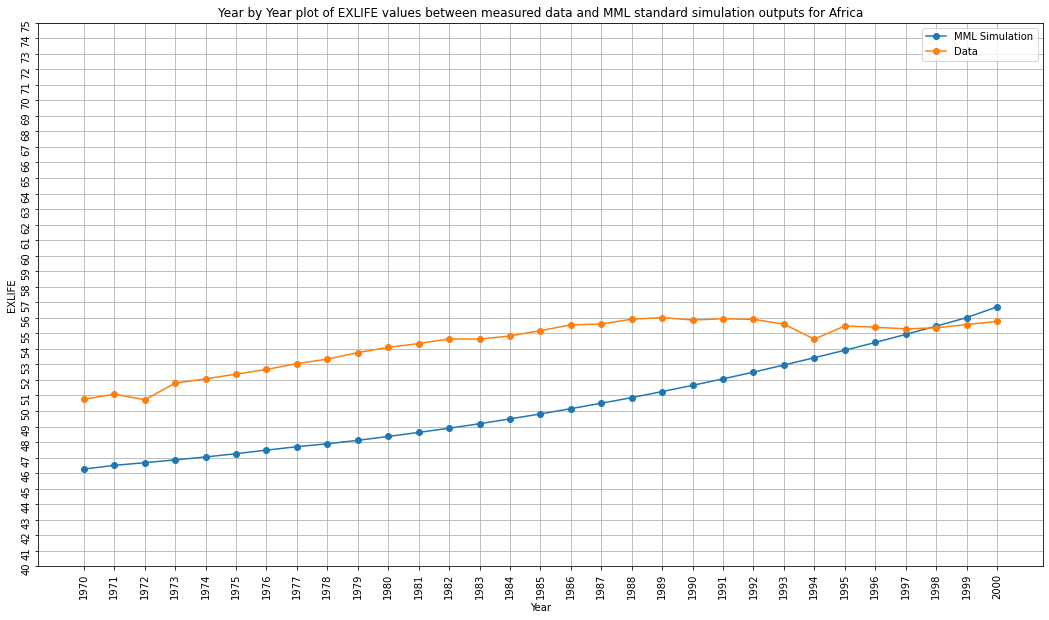

In [80]:
common.compare_mml_vs_truth_line_plot(df=df_comparison, x_col_name='Year', y_col_mml='mml_value', y_col_truth='truth_mean',variable_analyzed=MML_VARIABLE_ANALYZED, region=REGION, y_ticks=np.arange(40,76))

Mean seems to be quite accurate in that interval

### Error visualization

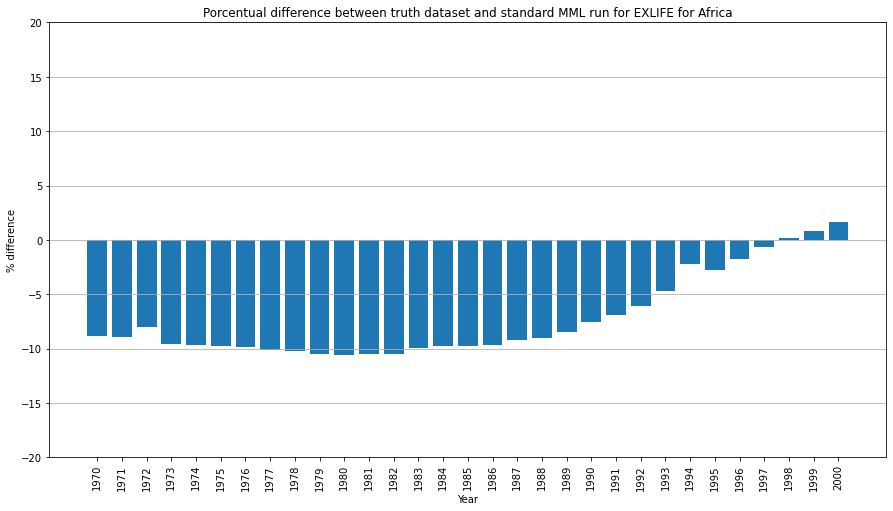

In [81]:
common.compute_porcentual_diff_between_truth_and_mml(df_comparison,'mml_value', 'truth_mean')
common.porcentual_diff_plot(df_comparison,MML_VARIABLE_ANALYZED, REGION, years_filtered, np.arange(-20,21,5))

In [82]:
common.save_porcentual_diff_to_excel_for_variable(df_comparison, MML_VARIABLE_ANALYZED, REGION)

## Attempt to see EXLIFE distribution

In [83]:
df_dist = common.get_countries_for_region(df, 'geo.name', REGION)[columns_filter]
df_dist
# len(df_dist['1970'])

,geo.name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
4,Argelia,57.49,57.76,58.16,58.54,59.06,59.50,59.99,60.57,61.17,...,71.40,71.73,71.96,72.13,72.31,72.79,72.95,73.12,73.55,73.87
7,Angola,48.74,48.97,49.16,49.39,49.60,49.54,49.52,49.59,49.70,...,50.79,50.96,49.70,51.13,51.96,52.31,52.69,52.83,52.92,53.36
34,Burundi,44.69,44.93,18.24,45.11,45.18,45.19,45.32,45.59,45.77,...,47.87,47.75,41.81,47.55,46.95,46.58,47.00,47.28,47.79,47.91
36,Camerun,51.71,52.03,52.47,52.84,53.22,53.64,53.95,54.32,54.79,...,58.16,57.86,57.35,56.97,56.49,56.06,55.51,55.00,54.78,54.46
40,Centroafrica,48.26,48.31,48.30,48.35,48.37,48.43,48.57,48.82,49.05,...,48.01,47.84,47.22,46.75,46.20,45.63,45.11,44.92,44.70,44.48
41,Chad,49.18,48.97,49.85,50.72,50.89,51.21,50.83,51.05,51.31,...,53.45,53.46,53.62,53.43,53.45,52.99,52.73,52.44,52.37,52.16
49,Zaire,50.33,50.60,50.80,51.10,51.45,51.62,51.82,52.04,52.20,...,53.62,53.58,53.48,53.20,53.14,51.13,52.47,52.63,53.06,53.37
50,Congo,48.83,49.21,49.59,50.02,50.51,50.98,51.43,51.76,52.08,...,54.16,54.19,53.35,53.12,52.68,52.30,46.71,50.21,51.97,52.78
53,Costa de Marfil,51.00,51.58,52.11,52.62,53.13,53.59,54.13,54.60,55.17,...,54.77,54.37,53.80,53.41,52.89,52.79,52.84,52.77,52.69,52.65
65,Egipto,51.53,52.45,52.71,53.05,54.04,54.80,55.48,56.23,57.10,...,65.54,66.17,66.69,67.01,67.69,68.08,68.44,69.01,69.37,69.88


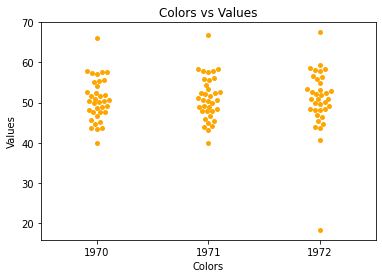

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

ax = sns.swarmplot(data=df_dist, x=0, y="1970", color="orange")
ax = sns.swarmplot(data=df_dist, x=1, y="1971", color="orange")
ax = sns.swarmplot(data=df_dist, x=2, y="1972", color="orange")
plt.xlabel("Colors")
plt.ylabel("Values")
ax.set_xticklabels(["1970","1971","1972"])
# plt.yticks(np.arange(50,91))
# plt.xticks(["1970","1971","1972"])
plt.title("Colors vs Values") # You can comment this line out if you don't need title
plt.show(ax)



In [85]:
# common.compare_mml_vs_truth_line_plot(df=df_comparison, x_col_name='Year', y_col_mml='mml_value', y_col_truth='truth_mean',variable_analyzed=MML_VARIABLE_ANALYZED, region=REGION, y_ticks=np.arange(50,91))

x_col_name='Year'
y_col_mml='mml_value'
y_col_truth='truth_mean'
variable_analyzed=MML_VARIABLE_ANALYZED
region=REGION
y_ticks=np.arange(50,91)

plt.figure(figsize=(18,10))
sns.plot(df_comparison[x_col_name], df_comparison[y_col_mml], label = "MML Simulation", marker='o')
plt.plot(df_comparison[x_col_name], df_comparison[y_col_truth], label = "Data", marker='o')
plt.xticks(df_comparison[x_col_name], rotation=90)
if not y_ticks is None:
    plt.yticks(y_ticks, rotation=90)
    
    
# ax = sns.swarmplot(data=df_dist, x=0, y="1970", color="orange")
# ax = sns.swarmplot(data=df_dist, x=1, y="1971", color="orange")
# ax = sns.swarmplot(data=df_dist, x=2, y="1972", color="orange")
# ax.set_xticklabels(["1970","1971","1972"])

plt.xlabel(x_col_name)
plt.ylabel(variable_analyzed)
plt.grid()
plt.legend()
plt.title(f"Year by Year plot of {variable_analyzed} values between measured data and MML standard simulation outputs for REGION")
plt.show()

AttributeError: module 'seaborn' has no attribute 'plot'

<Figure size 1296x720 with 0 Axes>

In [ ]:
df_comparison['Year'].astype(np.int64)
df_comparison['Year']

In [ ]:
sns.lineplot(data=df_comparison, x='Year', y='truth_mean')
# sns.swarmplot(data=df_dist, x=1970, y="1970", color="orange")
sns.lineplot(data=df_comparison, x='Year', y='mml_value')


In [ ]:
df_dist